# Logistic tracking

	

This file tracks some progress of the logistic case

In [9]:
#%%
import torch
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


#self written modules
import MMD

#%%
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#%%
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

epoch:  0  loss= tensor(0.0285, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0021, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0025, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:08.786802


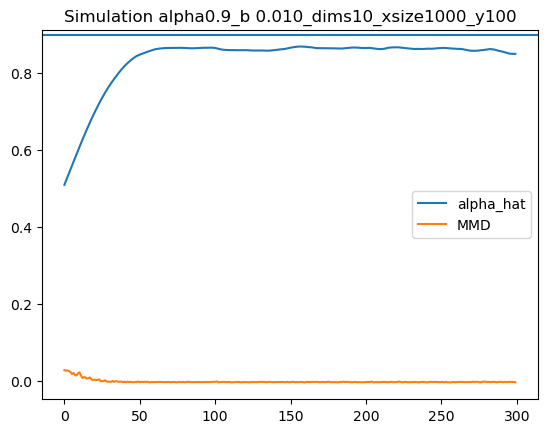

In [2]:


sample_size = 1000
y_sample_size = 100
dims = 10
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.90

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

b_params = {"alpha": 0.5}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y,sample_size,"logistic", device, b_params)



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.0471, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0005, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0005, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:11.617989


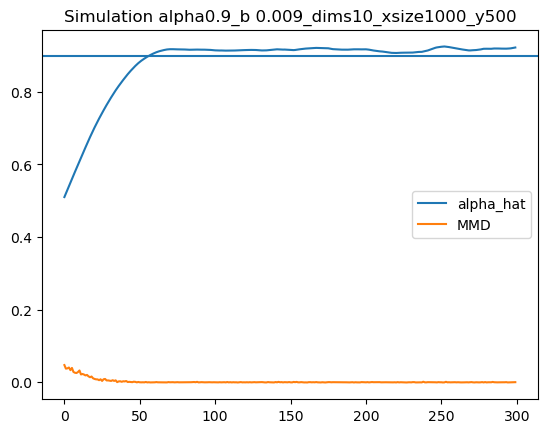

In [3]:


sample_size = 1000
y_sample_size = 500
dims = 10
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.90

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

b_params = {"alpha": 0.5}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y,sample_size,"logistic", device, b_params)



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.0229, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0015, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0014, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:09.796482


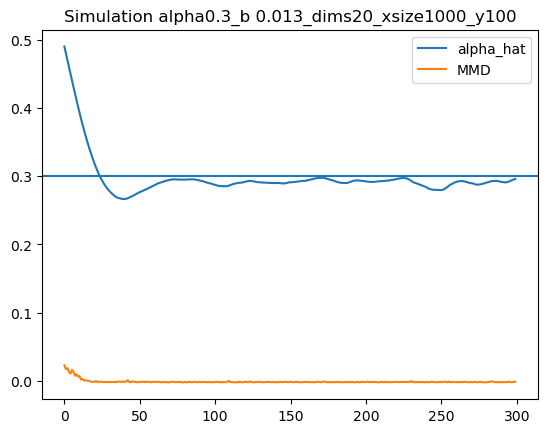

In [4]:


sample_size = 1000
y_sample_size = 100
dims = 20
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.30

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

b_params = {"alpha": 0.5}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y,sample_size,"logistic", device, b_params)


folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.0194, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(4.7863e-05, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(0.0017, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:18.436365


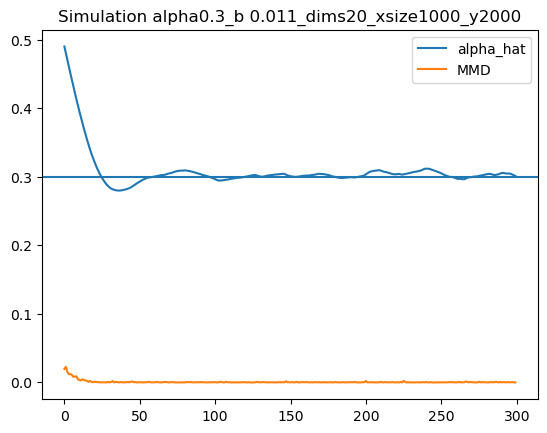

In [5]:


sample_size = 1000
y_sample_size = 2000
dims = 20
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.30

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

b_params = {"alpha": 0.5}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y,sample_size,"logistic", device, b_params)



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(nan, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:11.557698


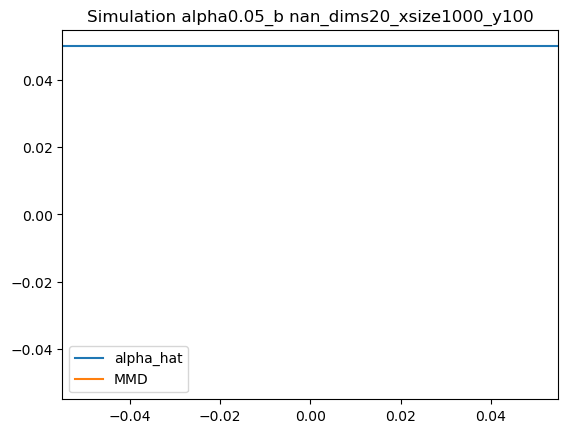

In [6]:


sample_size = 1000
y_sample_size = 100
dims = 20
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.05

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

b_params = {"alpha": 0.5}

# b heuristic could also just be a value
b = MMD.calc_b_heuristic(y,sample_size,"logistic", device, b_params)



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




when alpha gets small things kinda start falling apart

epoch:  0  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(nan, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:19.001671


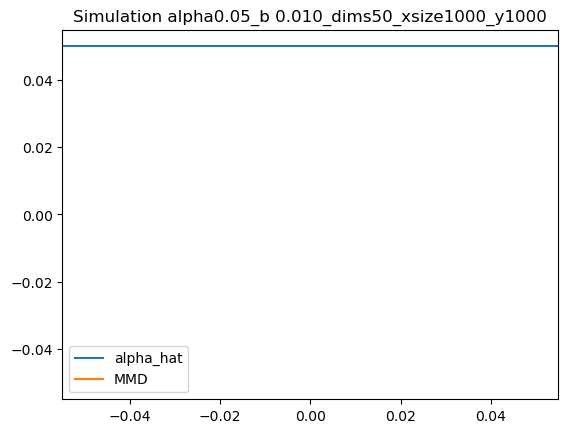

In [7]:


sample_size = 1000
y_sample_size = 1000
dims = 50
nr_iterations = 300
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.05

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.1137, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(0.0002, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(nan, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:42.747149


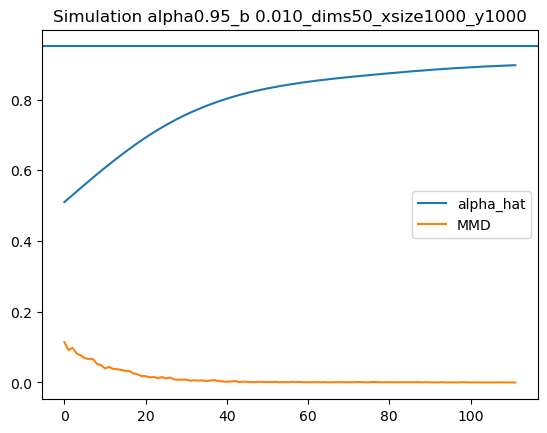

In [9]:


sample_size = 1000
y_sample_size = 1000
dims = 50
nr_iterations = 1000
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.95

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




In [4]:


sample_size = 1000
y_sample_size = 1000
dims = 50
nr_iterations = 1500
lr = 0.1
nr_simulations = 1
epoch_print_size = 100

alpha = 0.95

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01



folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.1007, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(nan, grad_fn=<SubBackward0>)


KeyboardInterrupt: 

# itterative b selection

epoch:  0  loss= tensor(0.0066, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0002, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0004, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(-0.0003, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(0.0002, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(0.0011, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(0.0001, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(0.0002, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(0.0005, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(-0.0002, grad_fn=<SubBackward0>)
epoch:  1000  loss= tensor(0.0021, grad_fn=<SubBackward0>)
epoch:  1100  loss= tensor(0.0002, grad_fn=<SubBackward0>)
epoch:  1200  loss= tensor(0.0007, grad_fn=<SubBackward0>)
epoch:  1300  loss= tensor(0.0003, grad_fn=<SubBackward0>)
epoch:  1400  loss= tensor(0.0004, grad_fn=<SubBackward0>)
epoch:  1500  loss= tensor(-0.0002, grad_fn=<SubBackward0>)
epoch:  1600  loss= tensor(-0.0001, grad_fn=<SubBackward0>)
epo

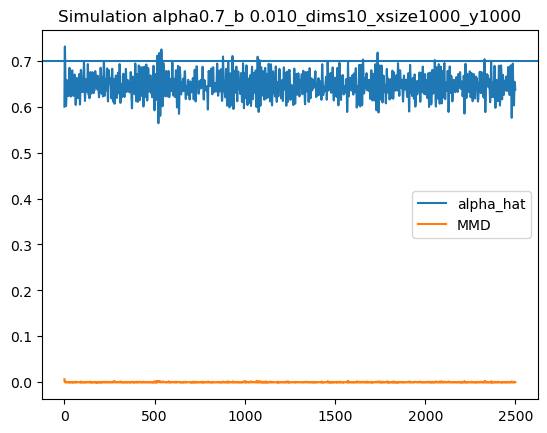

In [2]:


sample_size = 1000
y_sample_size = 1000
dims = 10
nr_iterations = 2500
lr = 0.1
nr_simulations = 1
epoch_print_size = 100

alpha = 0.7

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01

b_update = 500


folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_biter_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size, b_update=b_update)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




epoch:  0  loss= tensor(0.0042, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0002, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(0.0014, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(-0.0001, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(-0.0002, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(0.0007, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(-0.0003, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(-5.3644e-07, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(-0.0001, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(0.0002, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:24.032151


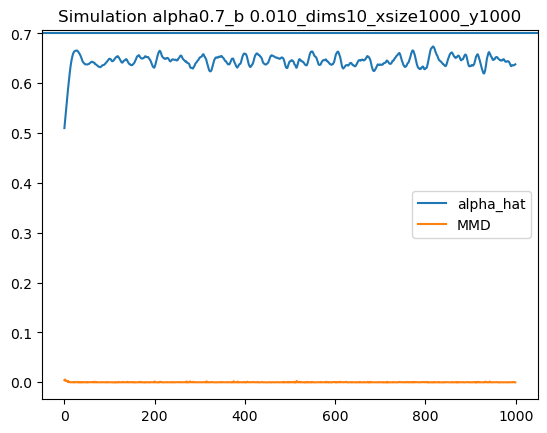

In [10]:


sample_size = 1000
y_sample_size = 1000
dims = 10
nr_iterations = 1000
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.7

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01

b_update = 0


folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size, b_update=b_update)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    




In [11]:
stacked_results.tail(50).mean()

alpha_hat    0.644204
MMD         -0.000139
b            0.010000
sim_nr       0.000000
dtype: float64

epoch:  0  loss= tensor(0.0108, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0026, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(-0.0021, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(-0.0025, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(-0.0022, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(-0.0025, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(-0.0024, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(-0.0023, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:18.366609


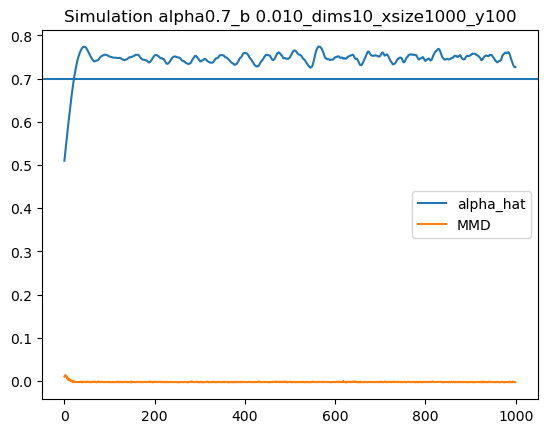

alpha_hat    0.746611
MMD         -0.002274
b            0.010000
sim_nr       0.000000
dtype: float64

In [15]:
sample_size = 1000
y_sample_size = 100
dims = 10
nr_iterations = 1000
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.7

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01

b_update = 0


folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_b{b: .3f}_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size, b_update=b_update)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    
#%%
stacked_results.tail(50).mean()



epoch:  0  loss= tensor(0.0077, grad_fn=<SubBackward0>)
epoch:  100  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  200  loss= tensor(-0.0024, grad_fn=<SubBackward0>)
epoch:  300  loss= tensor(-0.0026, grad_fn=<SubBackward0>)
epoch:  400  loss= tensor(-0.0019, grad_fn=<SubBackward0>)
epoch:  500  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  600  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  700  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  800  loss= tensor(nan, grad_fn=<SubBackward0>)
epoch:  900  loss= tensor(nan, grad_fn=<SubBackward0>)
Simulation nr 0, done in 0:00:16.853187


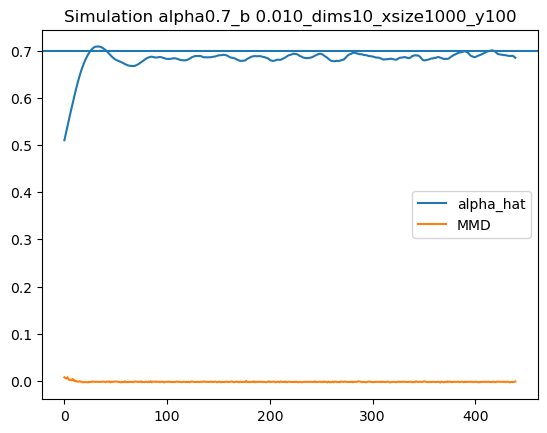

alpha_hat     NaN
MMD           NaN
b            0.01
sim_nr       0.00
dtype: float64

In [16]:
sample_size = 1000
y_sample_size = 100
dims = 10
nr_iterations = 1000
lr = 0.01
nr_simulations = 1
epoch_print_size = 100

alpha = 0.7

folder_name= "Logistic_Test"

y = MMD.sample_multivariate_logistic(y_sample_size,dims,alpha,device)

# b heuristic could also just be a value
b = 0.01

b_update = 100


folder_name= "Logistic_Test"
file_name = f"alpha{alpha}_biter_dims{dims}_xsize{sample_size}_y{y_sample_size}"

simulation_results = []

#%%

#%%
for sim in np.arange(nr_simulations):
    now=datetime.now()

    alpha_hat = torch.tensor([0.5]).to(device).requires_grad_()

#####
# setup optimizer
    optimizer = torch.optim.Adam([alpha_hat], lr=lr)

    simulation_index = pd.DataFrame({"sim_nr":np.repeat(sim, nr_iterations)})
    bandwidth = pd.DataFrame({"b": np.repeat(b, nr_iterations)})


    simulated_df = MMD.training_loop_multi_logist(alpha_hat, y, nr_iterations, sample_size, device, b, optimizer, epoch_print_size, b_update=b_update)

    simulated_df = pd.concat([simulated_df,bandwidth,simulation_index], axis=1)

    simulation_results.append(simulated_df)

    print(f"Simulation nr {sim}, done in {datetime.now()-now}")
    


#%%
stacked_results = pd.concat(simulation_results).reset_index(drop=True)


#%%
stacked_results.to_csv(f"{folder_name}/{file_name}.csv")
#%%

#%%
for index,df in enumerate(simulation_results):

    plt.plot(df[["alpha_hat", "MMD"]])
    plt.axhline(y=alpha)
    plt.title(f"Simulation {file_name}")
    plt.legend(["alpha_hat", "MMD"])
    plt.savefig(f"{folder_name}/{file_name}.svg")
    plt.show()
    
#%%
stacked_results.tail(50).mean()



In [ ]:
stacked_results